In [1]:
import geopandas as gpd
import pandas as pd
import jsonpickle as jp
import json
pd.set_option('display.max_columns', None)

Importing Data

In [2]:
bound = gpd.read_file('data/Texas/boundary_data/tx_2020.shp')
usVote = pd.read_csv('data/2020-HOUSE-precinct-general.csv')

In [3]:
display(bound)

,CNTY,COLOR,PREC,PCTKEY,CNTYKEY,G20VR,G20SSVR,G20PRERTRU,G20PREDBID,G20PRELJOR,G20PREGHAW,G20PREOWRI,G20USSRCOR,G20USSDHEG,G20USSLMCK,G20USSGCOL,G20RRCRWRI,G20RRCDCAS,G20RRCLSTE,G20RRCGGRU,G20SSCRHEC,G20SSCDMEA,G20SSCLASH,G20SSCRBLA,G20SSCDCHE,G20SSCRBOY,G20SSCDWIL,G20SSCLSTR,G20SSCRBUS,G20SSCDTRI,G20SSCLOXF,G20SCCRRIC,G20SCCDFRI,G20SCCRYEA,G20SCCDCLI,G20SCCRNEW,G20SCCDBIR,geometry
0,113,7,1104,1131104,57,2745,39.5,221,1173,7,12,0,232,1129,22,20,208,1146,25,19,208,1156,38,229,1166,209,1158,26,195,1157,32,216,1172,214,1169,219,1162,"POLYGON ((1314208.406 1178220.110, 1314211.847..."
1,201,2,0312,2010312,101,3973,11.3,1124,1460,21,12,0,1185,1336,43,26,1157,1300,46,40,1175,1319,57,1218,1328,1136,1359,45,1190,1290,54,1194,1343,1152,1373,1170,1345,"POLYGON ((1432565.993 851290.217, 1432575.099 ..."
2,351,4,0003,3510003,176,626,1.1,412,28,0,0,0,395,32,2,2,391,29,2,1,384,31,4,385,30,383,29,2,387,28,5,390,29,382,32,386,31,"POLYGON ((1602738.373 1008175.555, 1602745.401..."
3,181,4,0304,1810304,91,3058,4.5,1290,676,29,2,6,1293,642,40,7,1331,590,42,12,1306,627,36,1353,618,1318,615,38,1331,597,39,1335,632,1339,617,1347,619,"POLYGON ((1312523.436 1279889.507, 1312544.741..."
4,201,2,0877,2010877,101,5743,27.1,1352,2554,43,20,0,1377,2427,73,41,1329,2413,79,69,1327,2464,107,1406,2478,1327,2470,87,1316,2466,105,1359,2516,1379,2495,1382,2490,"POLYGON ((1409146.792 864246.161, 1409155.944 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9009,61,6,0106,610106,31,2520,67.4,638,877,12,5,2,625,838,19,21,570,863,20,21,562,829,38,600,856,565,816,33,560,868,32,604,860,594,843,621,822,"POLYGON ((1255418.897 426829.361, 1255403.935 ..."
9010,61,1,0073,610073,31,3720,77.1,857,1446,16,8,1,832,1382,37,29,747,1433,46,26,701,1396,67,794,1417,751,1366,51,716,1448,59,786,1446,770,1411,805,1396,"POLYGON ((1252204.610 425619.105, 1252185.198 ..."
9011,61,1,0100,610100,31,3111,77.3,804,1169,11,1,4,778,1133,31,17,698,1182,29,24,670,1160,52,748,1167,700,1138,38,663,1198,48,736,1183,711,1175,754,1138,"POLYGON ((1252591.226 431536.955, 1252583.487 ..."
9012,61,6,0095,610095,31,964,83.9,211,311,4,3,1,197,303,4,6,172,309,8,10,161,307,12,191,297,170,284,14,167,305,12,183,311,176,298,187,296,"POLYGON ((1262061.387 438158.516, 1262098.888 ..."


Boundary Data Preprocessing Functions

In [4]:
def padZero(code):
    diff = 7 - len(code)
    for i in range(0,diff):
        code = '0'+code
    return code

Boundary Data Preprocessing

In [5]:
bound.drop(["CNTYKEY","CNTY","COLOR"], axis = 1, inplace=True)
bound = bound[bound.columns.drop(list(bound.filter(regex='G20')))]
##bound['PREC'] = bound['PREC'].astype(int)
#bound['PCTKEY'] = bound['PCTKEY'].astype(int)
bound['PCTKEY'] = bound['PCTKEY'].apply(lambda precinct: padZero(precinct))

Voting Data preprocessing

In [6]:
usVote.drop(["office",'party_detailed','mode','county_name','county_fips','jurisdiction_name','jurisdiction_fips','candidate','district','magnitude','dataverse','year','stage','state','special','writein','state_fips','state_cen','state_ic','date','readme_check'], axis = 1, inplace=True)
vote = usVote[usVote['state_po'] == 'TX'].copy()
vote.drop(["state_po"], axis = 1, inplace=True)
#vote['precinct'] = vote['precinct'].astype(int)
display(vote)

,precinct,party_simplified,votes
680939,0050001,DEMOCRAT,117
680940,0050001,REPUBLICAN,165
680941,0050002,DEMOCRAT,989
680942,0050002,REPUBLICAN,373
680943,0050003,DEMOCRAT,241
...,...,...,...
710779,4570017,REPUBLICAN,254
710780,4570018,DEMOCRAT,113
710781,4570018,LIBERTARIAN,18
710782,4570018,OTHER,3


Combining Data Functions

In [7]:
def total_votes(precinct, party, source):
    #precintdf = source[(source['precinct'].str.contains(precinct)) & (source['party'] == party)]
    precinctdf = get_precinct(precinct, source)
    precinctdf = precinctdf[precinctdf['party_simplified'] == party]
    return precinctdf['votes'].sum()

def get_precinct(precinct, source):
    precinctdf = source[source['precinct'] == precinct]
    return precinctdf

Combining Data

In [8]:
state = bound
display(state)
display(vote)

,PREC,PCTKEY,geometry
0,1104,1131104,"POLYGON ((1314208.406 1178220.110, 1314211.847..."
1,0312,2010312,"POLYGON ((1432565.993 851290.217, 1432575.099 ..."
2,0003,3510003,"POLYGON ((1602738.373 1008175.555, 1602745.401..."
3,0304,1810304,"POLYGON ((1312523.436 1279889.507, 1312544.741..."
4,0877,2010877,"POLYGON ((1409146.792 864246.161, 1409155.944 ..."
...,...,...,...
9009,0106,0610106,"POLYGON ((1255418.897 426829.361, 1255403.935 ..."
9010,0073,0610073,"POLYGON ((1252204.610 425619.105, 1252185.198 ..."
9011,0100,0610100,"POLYGON ((1252591.226 431536.955, 1252583.487 ..."
9012,0095,0610095,"POLYGON ((1262061.387 438158.516, 1262098.888 ..."


,precinct,party_simplified,votes
680939,0050001,DEMOCRAT,117
680940,0050001,REPUBLICAN,165
680941,0050002,DEMOCRAT,989
680942,0050002,REPUBLICAN,373
680943,0050003,DEMOCRAT,241
...,...,...,...
710779,4570017,REPUBLICAN,254
710780,4570018,DEMOCRAT,113
710781,4570018,LIBERTARIAN,18
710782,4570018,OTHER,3


In [9]:
state['demVotes'] = state['PCTKEY'].apply(lambda precinct: total_votes(precinct, 'DEMOCRAT', vote))
state['repVotes'] = state['PCTKEY'].apply(lambda precinct: total_votes(precinct, 'REPUBLICAN', vote))
state['totalVotes'] = state['demVotes'] + state['repVotes']
display(state)

,PREC,PCTKEY,geometry,demVotes,repVotes,totalVotes
0,1104,1131104,"POLYGON ((1314208.406 1178220.110, 1314211.847...",1142,191,1333
1,0312,2010312,"POLYGON ((1432565.993 851290.217, 1432575.099 ...",1370,1158,2528
2,0003,3510003,"POLYGON ((1602738.373 1008175.555, 1602745.401...",30,399,429
3,0304,1810304,"POLYGON ((1312523.436 1279889.507, 1312544.741...",590,1344,1934
4,0877,2010877,"POLYGON ((1409146.792 864246.161, 1409155.944 ...",2478,1316,3794
...,...,...,...,...,...,...
9009,0106,0610106,"POLYGON ((1255418.897 426829.361, 1255403.935 ...",934,535,1469
9010,0073,0610073,"POLYGON ((1252204.610 425619.105, 1252185.198 ...",1556,667,2223
9011,0100,0610100,"POLYGON ((1252591.226 431536.955, 1252583.487 ...",1266,654,1920
9012,0095,0610095,"POLYGON ((1262061.387 438158.516, 1262098.888 ...",333,160,493


In [10]:
display(state['totalVotes'].value_counts())
display(state[state['totalVotes'] == 0])
display(vote[vote['precinct'].str.contains('943')])

0       413
1        31
2        21
3        19
11       14
       ... 
3537      1
1508      1
2056      1
2380      1
1920      1
Name: totalVotes, Length: 3075, dtype: int64

,PREC,PCTKEY,geometry,demVotes,repVotes,totalVotes
5,4370,4394370,"POLYGON ((1250192.630 1176171.141, 1250192.376...",0,0,0
40,0010,0050010,"MULTIPOLYGON (((1500983.935 1030083.422, 15010...",0,0,0
50,0008,0050008,"MULTIPOLYGON (((1494867.032 1028177.409, 14950...",0,0,0
169,2129,0292129,"POLYGON ((1148142.588 818619.597, 1148114.216 ...",0,0,0
222,3171,0293171,"POLYGON ((1142494.769 818343.851, 1142489.586 ...",0,0,0
...,...,...,...,...,...,...
8879,0108,0610108,"POLYGON ((1267607.013 440751.250, 1267723.086 ...",0,0,0
8920,0109,0610109,"POLYGON ((1241236.172 441188.521, 1241232.088 ...",0,0,0
8963,0094,0410094,"POLYGON ((1340446.551 948313.844, 1340450.477 ...",0,0,0
8969,109A,329109A,"MULTIPOLYGON (((800854.115 1090681.583, 800922...",0,0,0


,precinct,party_simplified,votes
687056,2010943,DEMOCRAT,211
687057,2010943,LIBERTARIAN,17
687058,2010943,REPUBLICAN,91
689474,4394328,DEMOCRAT,379
689475,4394328,LIBERTARIAN,33
...,...,...,...
707595,4394370,DEMOCRAT,0
707596,4394370,LIBERTARIAN,0
707597,4394370,OTHER,0
707598,4394370,OTHER,0


Exporting State Data

In [11]:
state.to_file('data/Texas/texasGeo.geojson', driver='GeoJSON', index = True)
noGeo = pd.DataFrame(state.drop(columns='geometry'))
noGeo.to_json('data/Texas/texas.json', orient = 'index', compression = 'infer', index = True, indent = 4)

Computing Adjacency Graph Functions

In [12]:
def generate_adj(precinct, state):
    return 0

def addEdge(edges, index1, index2):
    if(index1 < index2):
        edges.add((int(index1),int(index2)))
    if(index1 > index2):
        edges.add((int(index2),int(index1)))

Computing Adjacency Graph

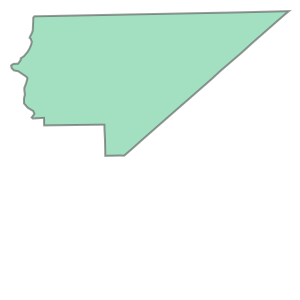

array([  61, 4459, 4482], dtype=int64)

{(3014, 3015),
 (7747, 7749),
 (5859, 5860),
 (3109, 4006),
 (2891, 3554),
 (4540, 4838),
 (44, 47),
 (6337, 7740),
 (2598, 7624),
 (2144, 2169),
 (2383, 4437),
 (3265, 5054),
 (3707, 3709),
 (1494, 2060),
 (7598, 7602),
 (7121, 7448),
 (2348, 2349),
 (5446, 8858),
 (7209, 7268),
 (6861, 8248),
 (4862, 4865),
 (421, 505),
 (3406, 4885),
 (4622, 4624),
 (1321, 3421),
 (1971, 2749),
 (1974, 3986),
 (5434, 5441),
 (1886, 1887),
 (7665, 7669),
 (342, 7163),
 (1066, 2498),
 (3409, 7411),
 (64, 6660),
 (2092, 2113),
 (3312, 3314),
 (41, 2512),
 (8303, 8306),
 (407, 583),
 (524, 1168),
 (3289, 4084),
 (6378, 6535),
 (2863, 2929),
 (2114, 6975),
 (4984, 4989),
 (6603, 6653),
 (1861, 3119),
 (1587, 1604),
 (4467, 4470),
 (6309, 7869),
 (3950, 3951),
 (636, 1759),
 (5482, 5616),
 (6681, 6694),
 (8701, 8702),
 (4530, 5923),
 (1731, 1733),
 (6910, 6931),
 (2796, 4686),
 (2591, 5974),
 (2625, 4804),
 (2303, 2309),
 (105, 8108),
 (1604, 2308),
 (5394, 5395),
 (1786, 1790),
 (6194, 6202),
 (7873, 791

27838

In [13]:
edges = set()
testi = 57
display(state['geometry'][testi])
touch = state['geometry'].touches(state['geometry'][testi])
statesubset = state[touch]
display(statesubset.index.values)

for i in state.index:
    touch = state['geometry'].touches(state['geometry'][i])
    statesubset = state[touch]
    for j in statesubset.index.values:
        addEdge(edges, i, j)

display(edges)
display(len(edges))

Edge Spot Check

<AxesSubplot: >

<AxesSubplot: >

<AxesSubplot: >

<AxesSubplot: >

<AxesSubplot: >

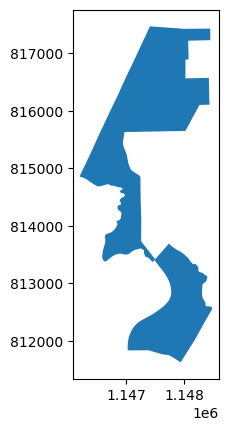

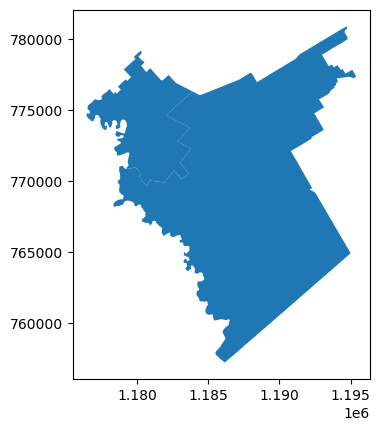

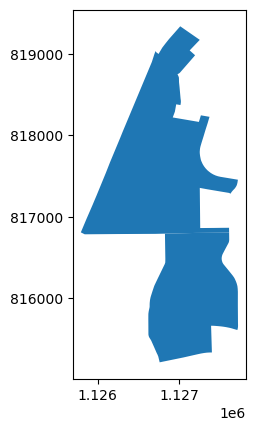

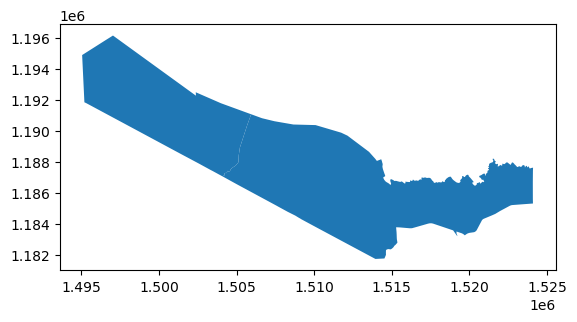

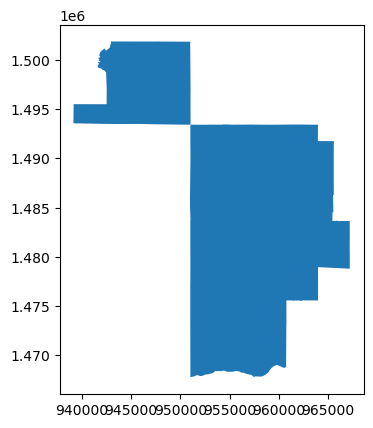

In [16]:
indexs = [6463, 7084]
display(state.iloc[indexs].plot())
indexs = [6228, 7618]
display(state.iloc[indexs].plot())
indexs = [964, 8214]
display(state.iloc[indexs].plot())
indexs = [2430, 4881]
display(state.iloc[indexs].plot())
indexs = [3368, 4922]
display(state.iloc[indexs].plot())


Exporting Adjacency Graph Edges

In [15]:
edgeList = list(edges)
display(edgeList)
display(type(edgeList[0]))
display(type(edgeList[0][0]))
with open('data/Texas/texasEdges.json', 'w', encoding='utf-8') as file:
    json.dump(edgeList, file, ensure_ascii=False, indent=4)

[(3014, 3015),
 (7747, 7749),
 (5859, 5860),
 (3109, 4006),
 (2891, 3554),
 (4540, 4838),
 (44, 47),
 (6337, 7740),
 (2598, 7624),
 (2144, 2169),
 (2383, 4437),
 (3265, 5054),
 (3707, 3709),
 (1494, 2060),
 (7598, 7602),
 (7121, 7448),
 (2348, 2349),
 (5446, 8858),
 (7209, 7268),
 (6861, 8248),
 (4862, 4865),
 (421, 505),
 (3406, 4885),
 (4622, 4624),
 (1321, 3421),
 (1971, 2749),
 (1974, 3986),
 (5434, 5441),
 (1886, 1887),
 (7665, 7669),
 (342, 7163),
 (1066, 2498),
 (3409, 7411),
 (64, 6660),
 (2092, 2113),
 (3312, 3314),
 (41, 2512),
 (8303, 8306),
 (407, 583),
 (524, 1168),
 (3289, 4084),
 (6378, 6535),
 (2863, 2929),
 (2114, 6975),
 (4984, 4989),
 (6603, 6653),
 (1861, 3119),
 (1587, 1604),
 (4467, 4470),
 (6309, 7869),
 (3950, 3951),
 (636, 1759),
 (5482, 5616),
 (6681, 6694),
 (8701, 8702),
 (4530, 5923),
 (1731, 1733),
 (6910, 6931),
 (2796, 4686),
 (2591, 5974),
 (2625, 4804),
 (2303, 2309),
 (105, 8108),
 (1604, 2308),
 (5394, 5395),
 (1786, 1790),
 (6194, 6202),
 (7873, 791

tuple

int